# TITANIC SURVIVED PROJECT

# Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

<B>Attribute Information</B>

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
import matplotlib.style as style   #for changing styles of plots
style.use("ggplot")
sns.set_style("whitegrid")
plt.rcParams["font.size"]=15
plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['figure.facecolor'] = '#FFE584'

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

no.of rows is 891 and no.of columns is 12

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# EDA

### Get general information about the dataset


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


there is some huge difference between 75% and max values so there is present in outliers.

### DUPLICATE VALUES

In [9]:
#checking duplicated values

df.duplicated().sum()

0

#there is no duplicated values

# FIND MISSING VALUES

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### we found there is missing values

In [11]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


<AxesSubplot:>

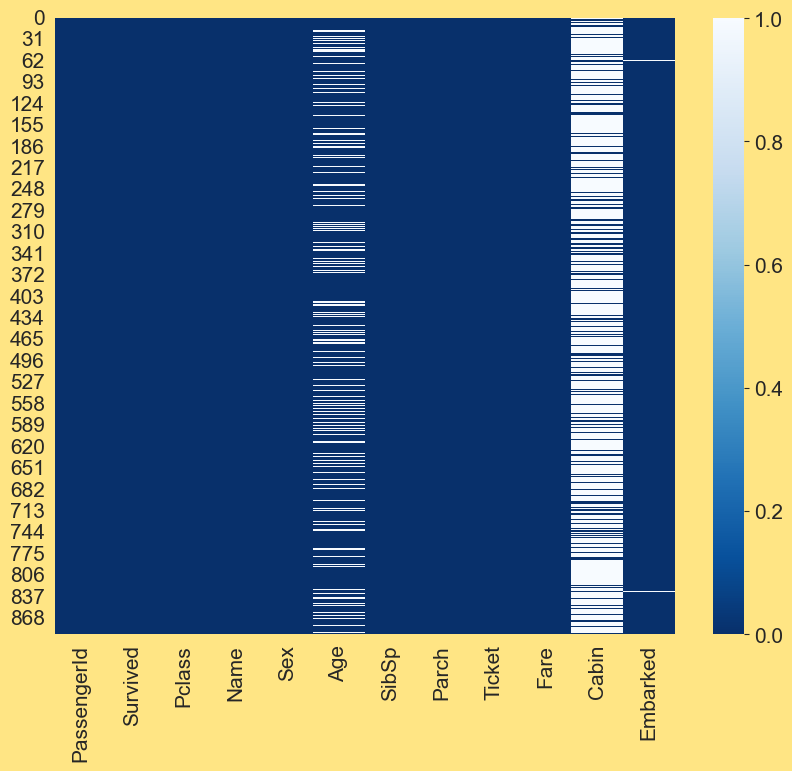

In [12]:
#cvisually showing missing values
sns.heatmap(df.isnull(), cmap='Blues_r')

## To see which column exactly contains bigger amount of missing values

Text(0.5, 1.0, 'Barplot to see the lacking of data values, size=18')

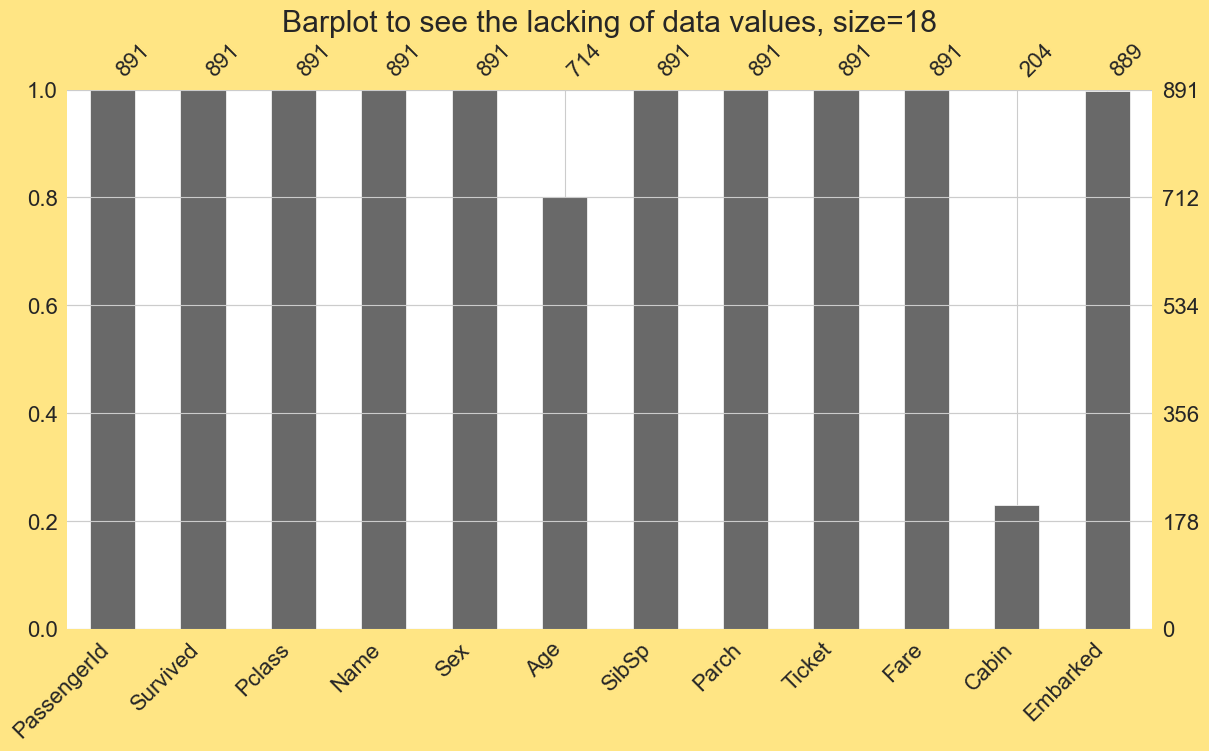

In [13]:
ms.bar(df, figsize= (14,7))
plt.title("Barplot to see the lacking of data values, size=18")

out of 891 rows , cabin column contains only 204 row data only vice versa age is 714, embarked is 889

# replacing with missing  values

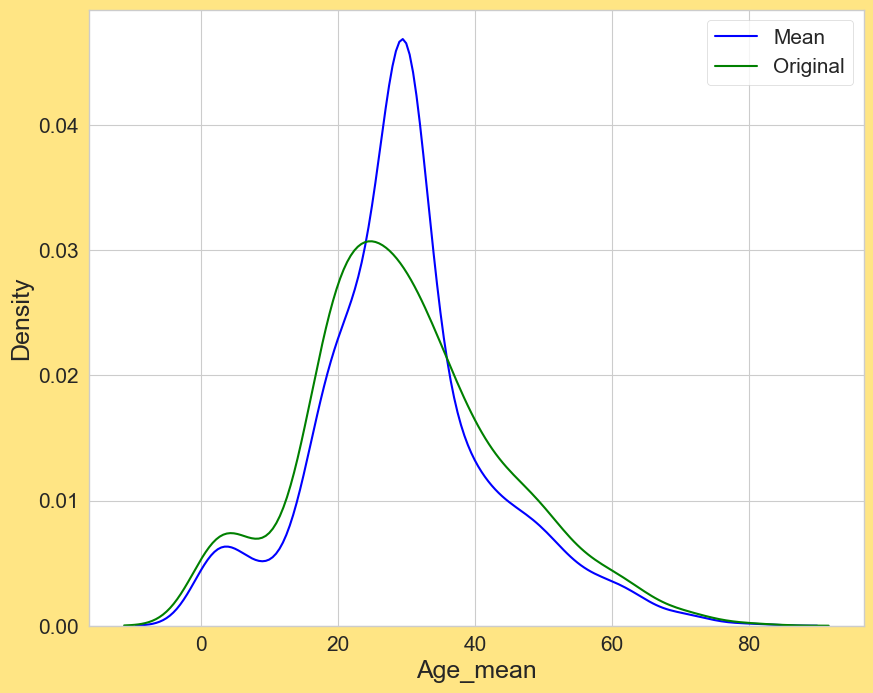

In [14]:
#first we compare between the curves for initial values and replaced with mean values

df["Age_mean"] = df["Age"].fillna(df["Age"].mean())

#checking difference of curves between replaced and original values

sns.kdeplot(df["Age_mean"], color= 'blue' , label="Mean")
sns.kdeplot(df["Age"], color= 'green' , label="Original")
plt.legend()

Filling up the spots of Missing values does change the curve.

green meant without getting replaced by mean values and blue is meant to replaced by Mean value after when replaced

In [15]:
df.drop(["Age_mean"],axis=1 , inplace=True)

#finally we replace them with mean

df["Age"]= df["Age"].fillna(df["Age"].mean())

In [16]:
df["Age"].isnull().sum()

0

# dropping unnecessry columns

In [17]:
#dropping 'Cabin' column from dataset because it has Highest % of missing values
#also we drop "name", "Ticket", "Fare" column as they are irrelevant in our analysis

df.drop(["Cabin","Name", "Ticket", "Fare", "PassengerId"],axis=1, inplace=True)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [19]:
df.dropna(inplace=True)

<AxesSubplot:>

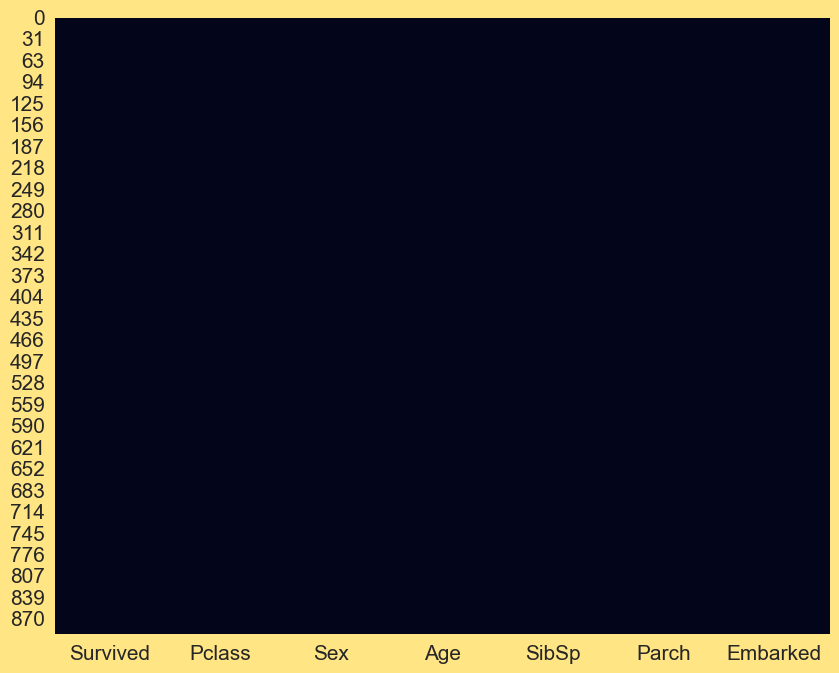

In [20]:
sns.heatmap(df.isnull(), cbar=False)

In [21]:
df.shape

(889, 7)

# Analysis with visualization

0    549
1    340
Name: Survived, dtype: int64


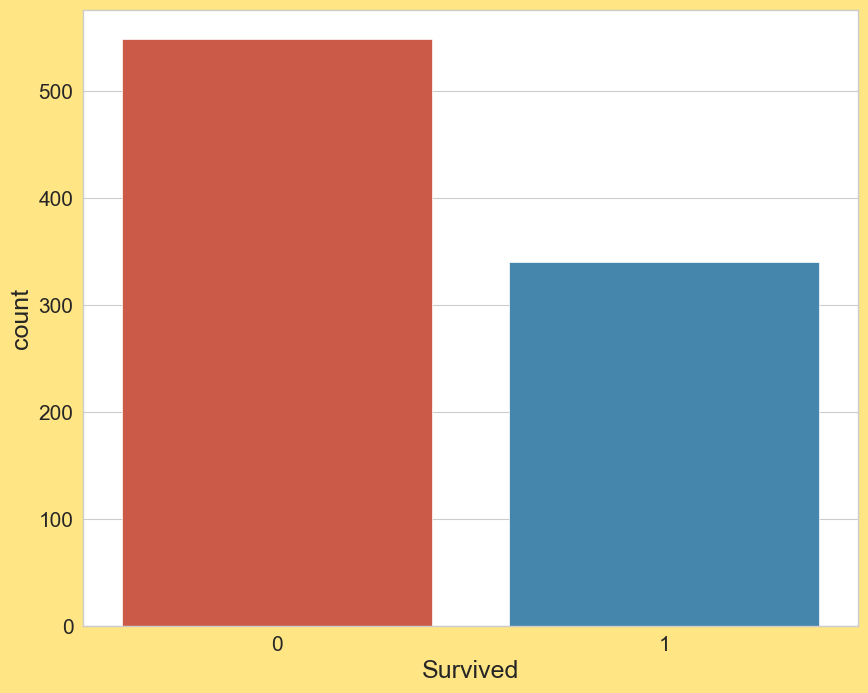

In [22]:
print(df["Survived"].value_counts())

sns.countplot(x='Survived', data=df)
plt.show()

549 survived and 340 not survived

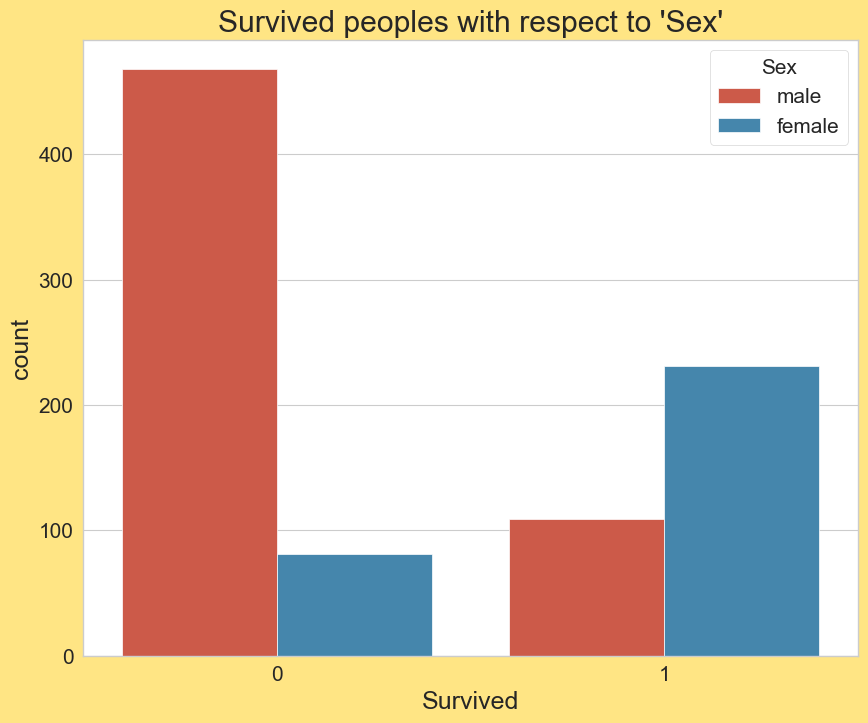

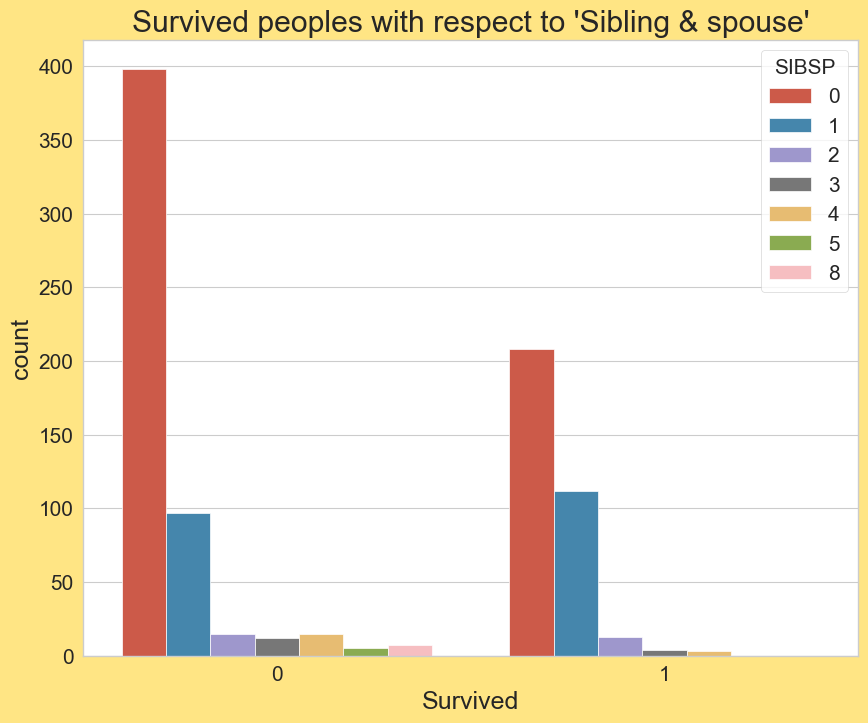

In [23]:
#visualization of survived values with respect to different features
sns.countplot("Survived", data=df, hue="Sex")
plt.title("Survived peoples with respect to 'Sex'")
plt.show()

sns.countplot("Survived", hue="SibSp", data=df)
plt.title("Survived peoples with respect to 'Sibling & spouse'")
plt.legend(title="SIBSP", loc='upper right')
plt.show()

0 represents not survived and 1 is for survives

woman are thirce more likely to survive than males

3    491
1    214
2    184
Name: Pclass, dtype: int64


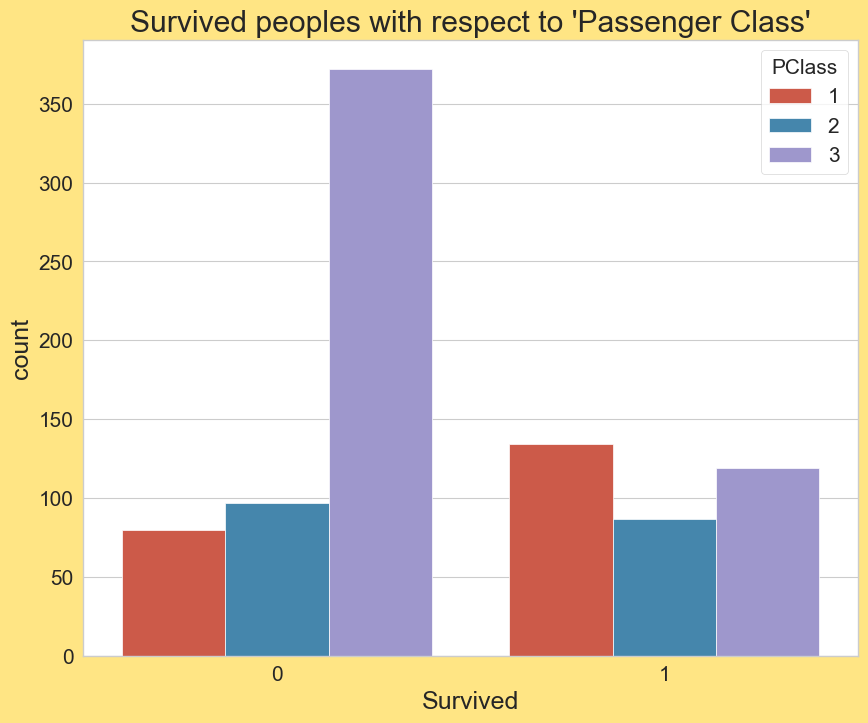

In [24]:
print(df["Pclass"].value_counts())

sns.countplot("Survived", hue="Pclass", data=df)
plt.title("Survived peoples with respect to 'Passenger Class'")
plt.legend(title="PClass", loc='upper right')
plt.show()

passenger who booked third class are likely to not survived than other class

<AxesSubplot:ylabel='Frequency'>

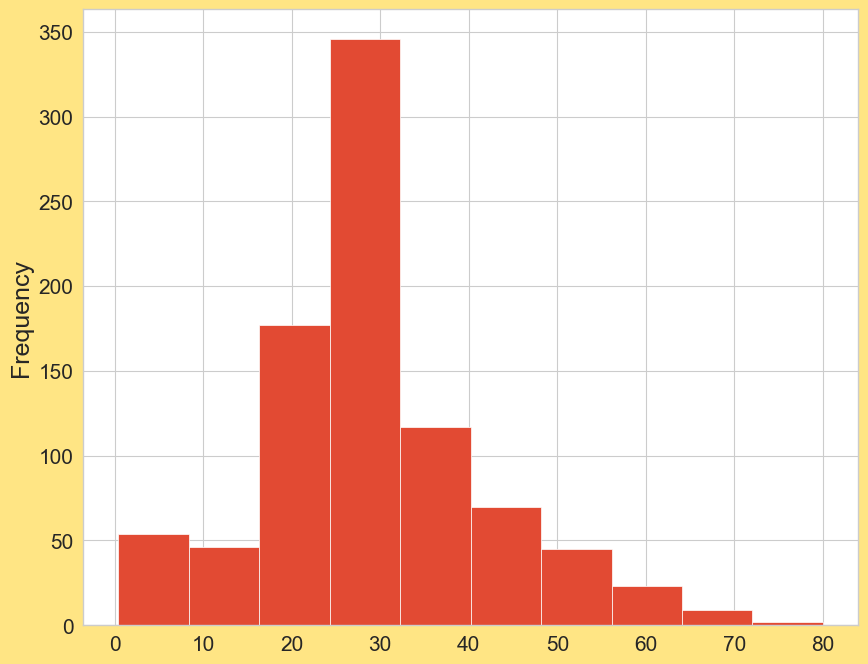

In [25]:
df['Age'].plot.hist()

In [26]:
#we can say that highest age group travelling are amoung the young age between 20-40
#very few passengers in age group 70-80

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


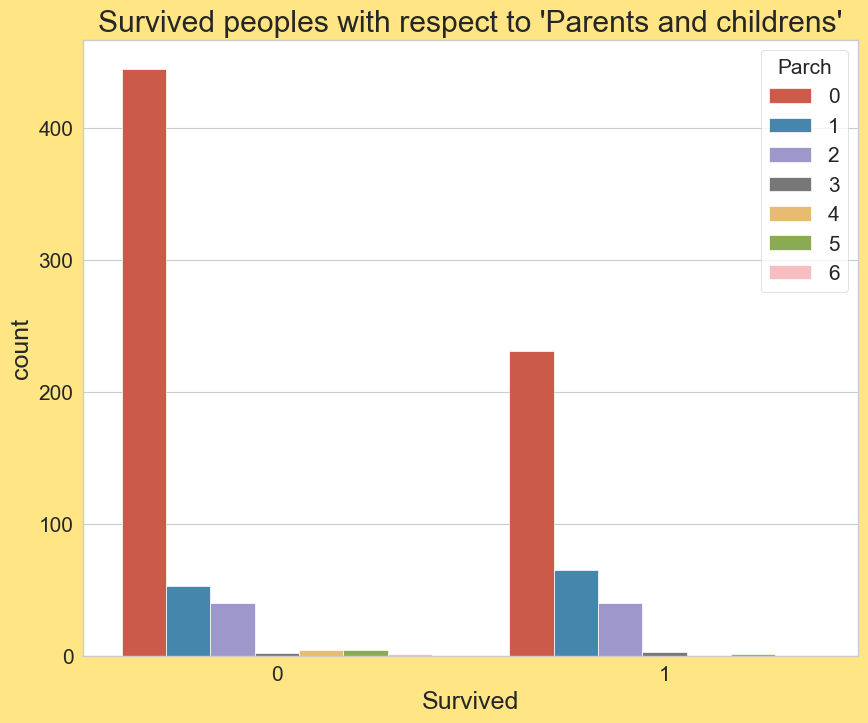

In [27]:
print(df["Parch"].value_counts())

sns.countplot("Survived", hue="Parch", data=df)
plt.title("Survived peoples with respect to 'Parents and childrens'")
plt.legend(title="Parch", loc='upper right')
plt.show()

S    644
C    168
Q     77
Name: Embarked, dtype: int64


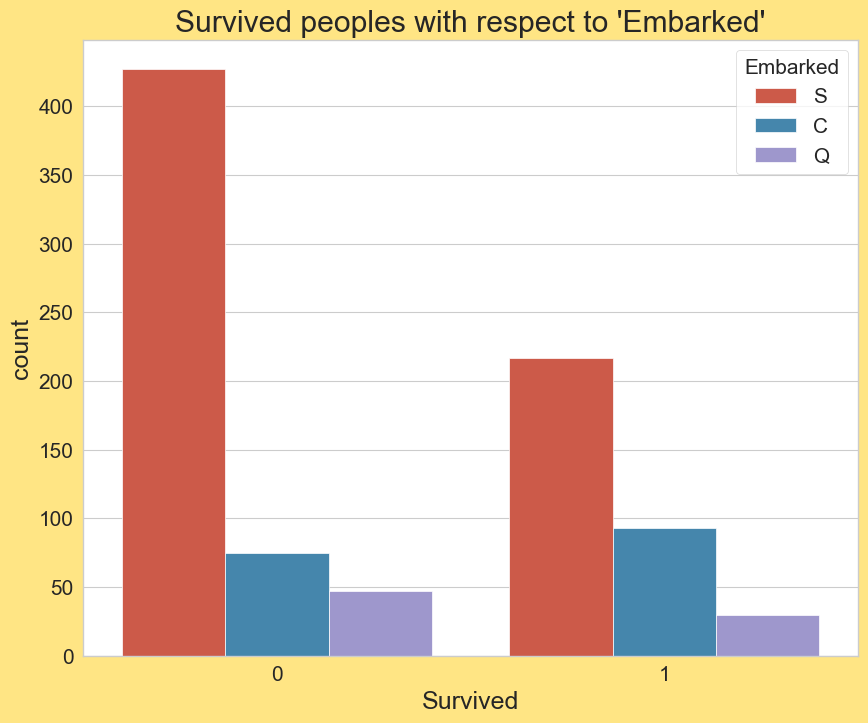

In [28]:
print(df["Embarked"].value_counts())
sns.countplot("Survived", hue="Embarked", data=df)
plt.title("Survived peoples with respect to 'Embarked'")
plt.legend(title="Embarked", loc='upper right')
plt.show()

# CROSS TABLE

In [29]:
pd.crosstab(df['Survived'], df["Pclass"], margins=True, margins_name='Total')

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,134,87,119,340
Total,214,184,491,889


#first class passengers survived more than other class

In [30]:
pd.crosstab(df['Survived'], df["Sex"], margins=True, margins_name='Total')

Sex,female,male,Total
Survived,,,
0,81,468,549
1,231,109,340
Total,312,577,889


#female passenges survived more than other male passengers

In [31]:
pd.crosstab(df['Survived'], df["SibSp"], margins=True, margins_name='Total')

SibSp,0,1,2,3,4,5,8,Total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,208,112,13,4,3,0,0,340
Total,606,209,28,16,18,5,7,889


here explians, passengers having neither any sibiling nor spouse , are not survived more than others

# ||PIVOT TABLE ||

In [32]:
pivot = df.pivot_table("Survived",index= ["Embarked", "Pclass", "SibSp"], columns="Sex")
pivot

Sex                      female      male
Embarked Pclass SibSp                    
C        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
Q        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
S        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000

<AxesSubplot:xlabel='Embarked,Pclass,SibSp'>

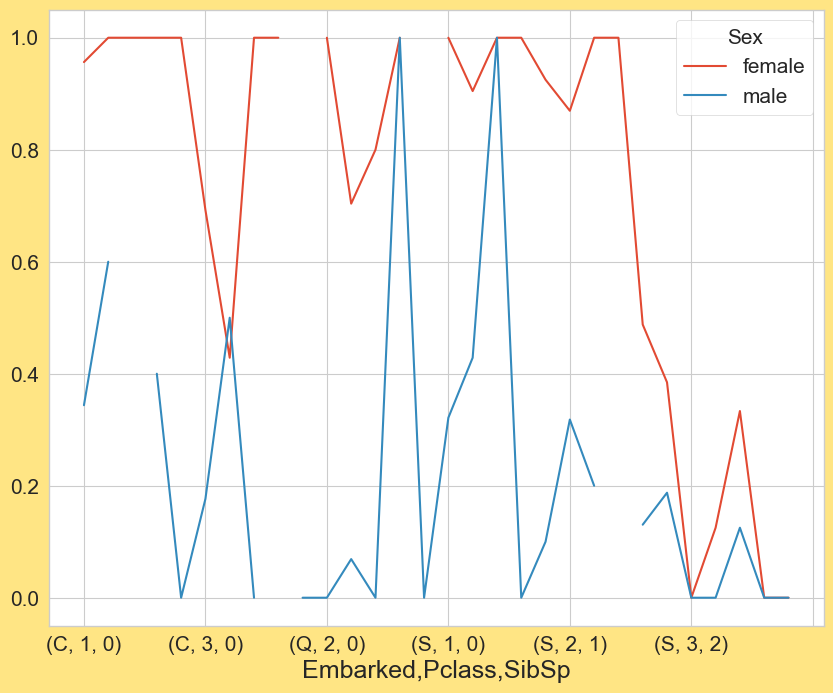

In [33]:
pivot.plot()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


# convert object data into numerical data to read the machine learning analysis

In [35]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [36]:
df[["Sex", "Embarked"]] = oe.fit_transform(df[["Sex", "Embarked"]])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1.0,22.000000,1,0,2.0
1,1,1,0.0,38.000000,1,0,0.0
2,1,3,0.0,26.000000,0,0,2.0
3,1,1,0.0,35.000000,1,0,2.0
4,0,3,1.0,35.000000,0,0,2.0
...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,2.0
887,1,1,0.0,19.000000,0,0,2.0
888,0,3,0.0,29.699118,1,2,2.0
889,1,1,1.0,26.000000,0,0,0.0


# checking correlation

In [37]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.074673,-0.034040,0.083151,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.327954,0.081656,0.016824,0.164681
Sex,-0.541585,0.127741,1.000000,0.089434,-0.116348,-0.247508,0.110320
Age,-0.074673,-0.327954,0.089434,1.000000,-0.231875,-0.178232,-0.028927
SibSp,-0.034040,0.081656,-0.116348,-0.231875,1.000000,0.414542,0.068900
Parch,0.083151,0.016824,-0.247508,-0.178232,0.414542,1.000000,0.040449
Embarked,-0.169718,0.164681,0.110320,-0.028927,0.068900,0.040449,1.000000


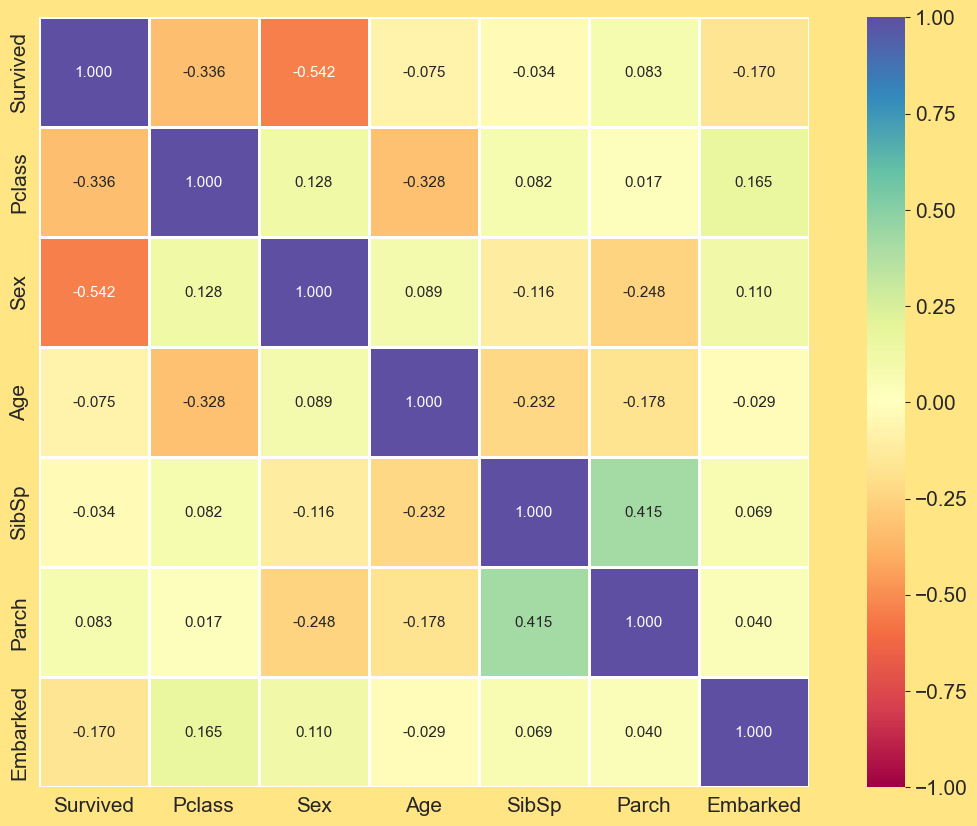

In [38]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':11}, cmap="Spectral",linewidth=1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# Now checking skewness

In [39]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Embarked   -1.261367
dtype: float64

We can see there is some skewness in Sibsp and parch but we can ignore the sknewness in categorical columns. so we can go ahead to next analysis

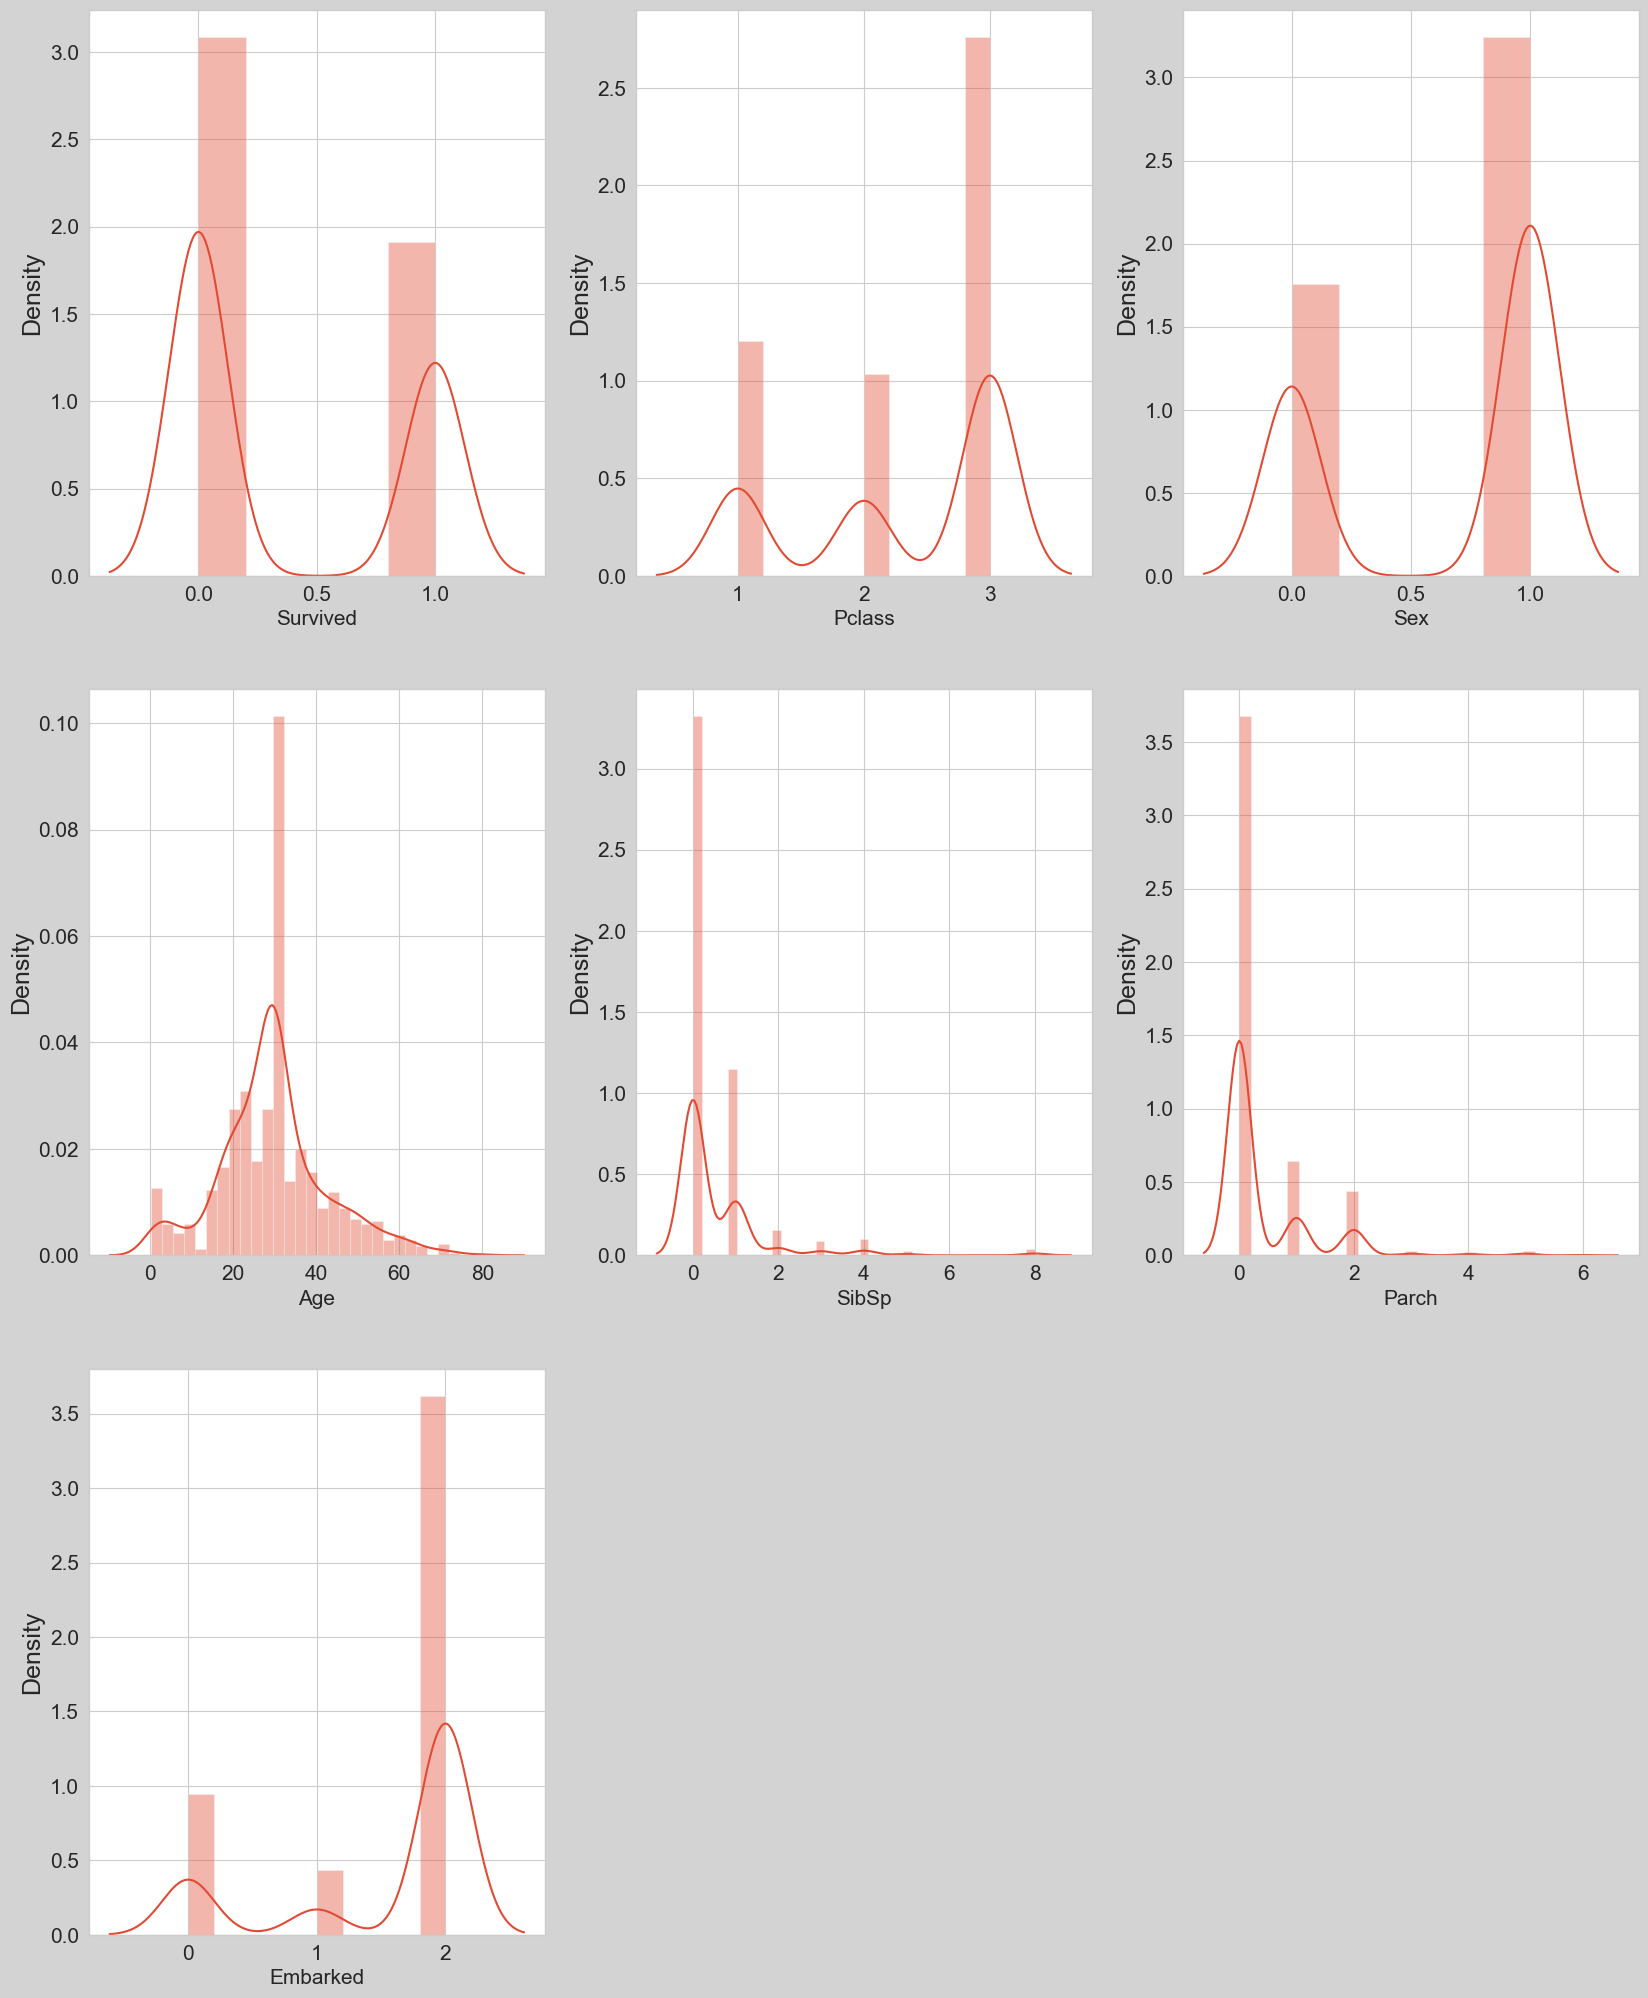

In [40]:
plt.figure(figsize=(20,25),facecolor='lightgrey')
pltno=1

for c in df:
    if pltno<=12:
        ax=plt.subplot(3,3,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

Skewness is cosiderable

### Checking for Outliers now

Survived       AxesSubplot(0.125,0.653529;0.227941x0.226471)
Pclass      AxesSubplot(0.398529,0.653529;0.227941x0.226471)
Sex         AxesSubplot(0.672059,0.653529;0.227941x0.226471)
Age            AxesSubplot(0.125,0.381765;0.227941x0.226471)
SibSp       AxesSubplot(0.398529,0.381765;0.227941x0.226471)
Parch       AxesSubplot(0.672059,0.381765;0.227941x0.226471)
Embarked           AxesSubplot(0.125,0.11;0.227941x0.226471)
dtype: object

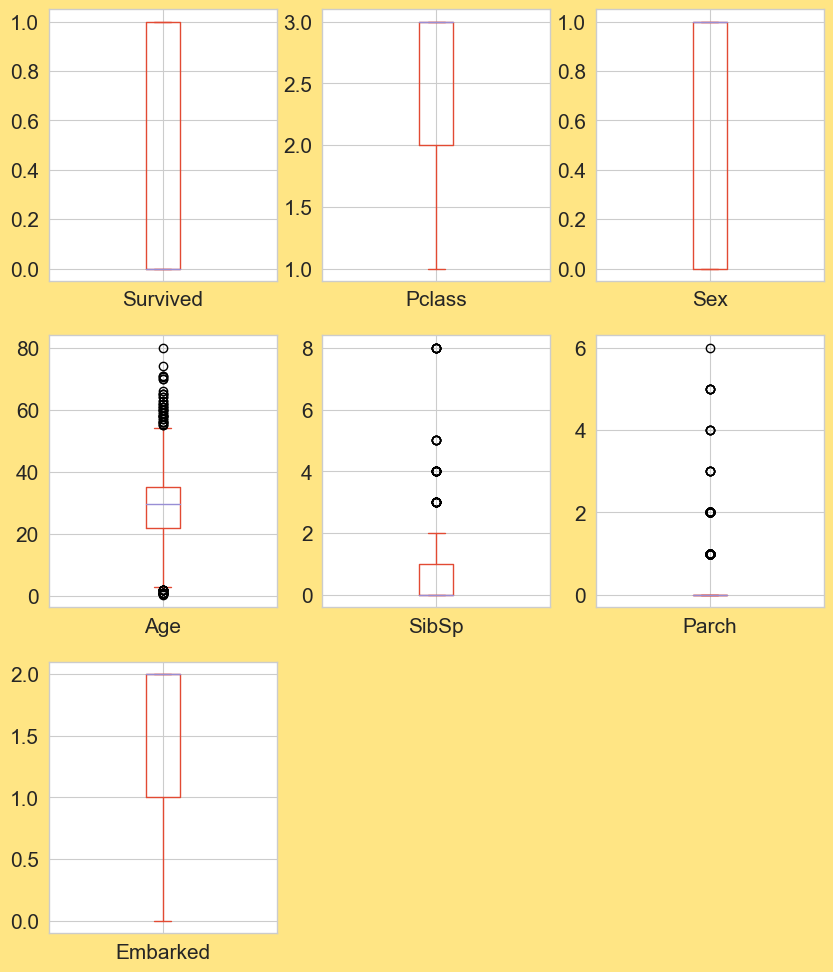

In [41]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,12))

There are outliers are present in dataset. we can remove that

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df1=df[(z<3).all(axis=1)]
df1

(array([ 13,  16,  25,  50,  59,  67,  70,  85,  95, 115, 118, 158, 163,
       166, 170, 179, 181, 200, 232, 260, 265, 277, 323, 359, 385, 436,
       437, 479, 492, 540, 541, 566, 609, 629, 637, 671, 677, 682, 685,
       735, 744, 773, 786, 791, 812, 823, 844, 848, 849, 856, 861, 883],
      dtype=int64), array([5, 4, 5, 4, 4, 4, 4, 5, 3, 3, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 4, 5, 5, 4, 3, 4, 4, 5, 5, 3, 5, 3, 5, 4, 4, 5, 3, 5, 4, 4,
       4, 4, 4, 4, 3, 5, 4, 5], dtype=int64))


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1.0,22.000000,1,0,2.0
1,1,1,0.0,38.000000,1,0,0.0
2,1,3,0.0,26.000000,0,0,2.0
3,1,1,0.0,35.000000,1,0,2.0
4,0,3,1.0,35.000000,0,0,2.0
...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,2.0
887,1,1,0.0,19.000000,0,0,2.0
888,0,3,0.0,29.699118,1,2,2.0
889,1,1,1.0,26.000000,0,0,0.0


Therefore data loss= ((891-837)/891)*100= 6.06%

Which is acceptable as its below 10%

### Standardizing the data

In [43]:
#splitting the data
X=df1.drop(['Survived'],axis=1)
Y=df1['Survived']

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X

array([[ 8.53602056e-01,  7.30045912e-01, -6.41760454e-01,
         1.00299395e+00, -4.64376155e-01,  5.97081967e-01],
       [-1.53192356e+00, -1.36977686e+00,  6.86077235e-01,
         1.00299395e+00, -4.64376155e-01, -1.89547467e+00],
       [ 8.53602056e-01, -1.36977686e+00, -3.09801032e-01,
        -5.60331815e-01, -4.64376155e-01,  5.97081967e-01],
       ...,
       [ 8.53602056e-01, -1.36977686e+00, -2.81179243e-03,
         1.00299395e+00,  2.97529501e+00,  5.97081967e-01],
       [-1.53192356e+00,  7.30045912e-01, -3.09801032e-01,
        -5.60331815e-01, -4.64376155e-01, -1.89547467e+00],
       [ 8.53602056e-01,  7.30045912e-01,  1.88138102e-01,
        -5.60331815e-01, -4.64376155e-01, -6.49196353e-01]])

### Checking multicollinearity using VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Pclass,1.210138
1,Sex,1.123265
2,Age,1.245418
3,SibSp,1.160630
4,Parch,1.265545
5,Embarked,1.036271


We can see that every column is in the acceptable range

### Balancing the data usin SMOTE

In [46]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=3)
train_x,train_y=smt.fit_resample(scaled_X,Y)
train_y.value_counts()

0    505
1    505
Name: Survived, dtype: int64

data is balanced

# Now fitting the models

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
Model= [GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [49]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=i)
    for m in Model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8379446640316206 on Random State: 11


So the best random state is 42

In [50]:
x_train,x_test,y_train,y_test = train_test_split(train_x,train_y,test_size = .25, random_state=42)

In [51]:
Model= [LogisticRegression(),RandomForestClassifier(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:  0.8260869565217391

 Confusion matrix: 
 [[ 93  21]
 [ 23 116]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       114
           1       0.85      0.83      0.84       139

    accuracy                           0.83       253
   macro avg       0.82      0.83      0.82       253
weighted avg       0.83      0.83      0.83       253



Accuracy score of RandomForestClassifier() is:  0.8181818181818182

 Confusion matrix: 
 [[ 89  25]
 [ 21 118]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       114
           1       0.83      0.85      0.84       139

    accuracy                           0.82       253
   macro avg       0.82      0.81      0.82       253
weighted avg       0.82      0.82      0.82       253



Accuracy score of GaussianNB() is:  0.8142292490118577

 Confusion m

### the best Accuracy score is KNeighborsClassifier() is:  0.8379446640316206

In [52]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
pred = rfc.predict(x_test)
ls=accuracy_score(y_test,pred)
lscore= cross_val_score(rfc,x_train,y_train)
lsc=lscore.mean()

lscore_selected=cross_val_score(rfc,x_train,y_train,cv=6).mean()
print("The cv score is: ", lscore_selected,"\nThe accuracy score is: ", ls)

The cv score is:  0.799243844519435 
The accuracy score is:  0.8181818181818182


### Hyperparameter Tuning

In [54]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gss=GridSearchCV(rfc,param,cv=5)
gss.fit(x_train,y_train)
gss.best_params_

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'auto'}

In [55]:
final_model=RandomForestClassifier(max_features='sqrt',criterion='entropy',max_depth=100)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 82.21343873517787


### ROC curve

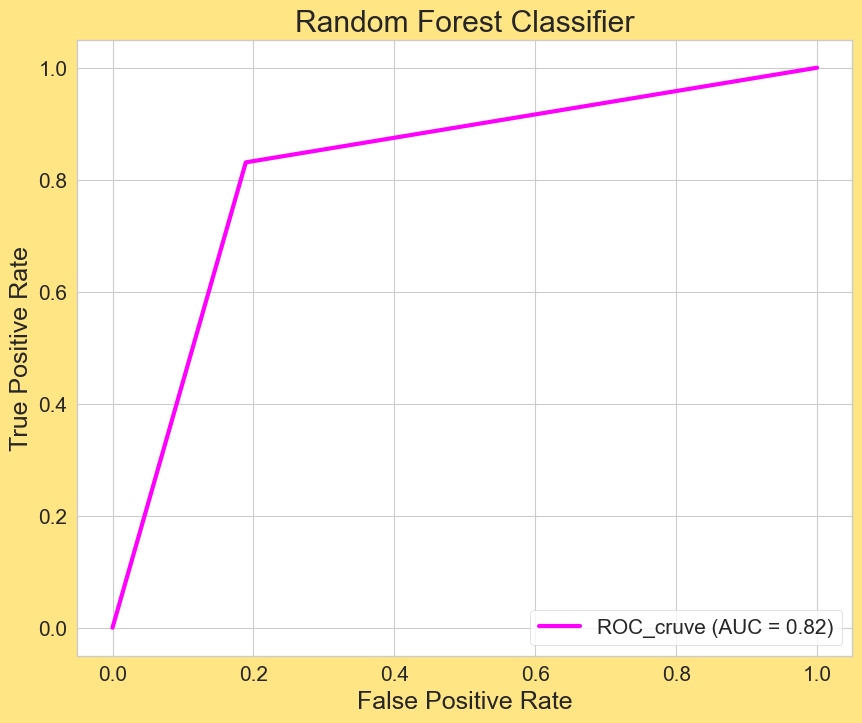

In [56]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(fmod_pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=3,color='magenta')
plt.title('Random Forest Classifier')
plt.show()

### Plotting Confusion Matrix

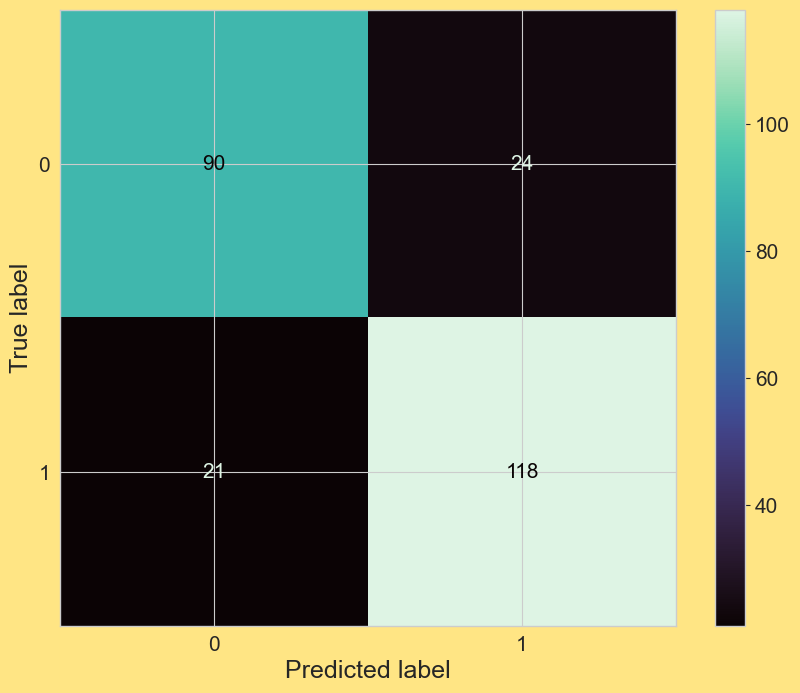

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, fmod_pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='mako')

In [58]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1.0,22.0,1,0,2.0
1,1,1,0.0,38.0,1,0,0.0
2,1,3,0.0,26.0,0,0,2.0
3,1,1,0.0,35.0,1,0,2.0
4,0,3,1.0,35.0,0,0,2.0


In [59]:
#BULDING THE PREDICTION SYSTEM
input_data = (3,1,35,0,0,2)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print("Predicted passenger data:",str(prediction))

Predicted passenger data: [0]


### getting right prediction. so let's save the model

# Saving the trained model

In [60]:
filename= "Titanic survival data analysis.pkl"
joblib.dump(final_model,filename)

['Titanic survival data analysis.pkl']

In [61]:
hs= joblib.load(open('Titanic survival data analysis.pkl', 'rb'))
result = hs.score(x_test, y_test)*100
print(result)

82.21343873517787


# thank you##